In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 500,100
import seaborn as sns
from math import sqrt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics
from datetime import datetime
from datetime import date, datetime
from matplotlib import dates as mdates

In [4]:
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/D2/US_counties_COVID19_health_weather_data.csv')

Mounted at /content/drive


In [5]:
data.shape
num_fips = len(data['fips'].unique())
num_fips

3140

In [6]:
covid = data[(data['fips']=='53061')]
covid.shape

(319, 227)

In [7]:
covid.head()

date     county       state   fips  cases  deaths  \
0  2020-01-21  Snohomish  Washington  53061      1     0.0   
1  2020-01-22  Snohomish  Washington  53061      1     0.0   
2  2020-01-23  Snohomish  Washington  53061      1     0.0   
4  2020-01-24  Snohomish  Washington  53061      1     0.0   
7  2020-01-25  Snohomish  Washington  53061      1     0.0   

  stay_at_home_announced stay_at_home_effective        lat         lon  ...  \
0                     no                     no  48.047489 -121.697307  ...   
1                     no                     no  48.047489 -121.697307  ...   
2                     no                     no  48.047489 -121.697307  ...   
4                     no                     no  48.047489 -121.697307  ...   
7                     no                     no  48.047489 -121.697307  ...   

   min_temp_3d_avg  min_temp_5d_avg  min_temp_10d_avg  min_temp_15d_avg  \
0        38.266667            38.92             38.44         36.146667   
1        39.233333            41.12             39.76         37.613333   
2        42.900000            41.74             41.15         38.226667   
4        44.600000            42.54             41.75         38.226667   
7        44.000000            43.38             40.78         39.166667   

   dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  dewpoint_15d_avg  \
0        40.333333            41.64             40.74         37.973333   
1        42.633333            42.98             41.68         39.440000   
2        44.733333            43.72             42.47         40.120000   
4        46.000000            44.30             42.88         41.293333   
7        44.633333            44.28             42.55         42.280000   

   date_stay_at_home_announced  date_stay_at_home_effective  
0                   2020-03-23                   2020-03-23  
1                   2020-03-23                   2020-03-23  
2                   2020-03-23                   2020-03-23  
4                   2020-03-23                   2020-03-23  
7                   2020-03-23                   2020-03-23  

[5 rows x 227 columns]

In [8]:
covid['date'] = pd.to_datetime(covid['date'], infer_datetime_format=True)
dataset = covid.set_index(['date'])
dataset.head(100)

<ipython-input-8-c85d4abf9f0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['date'] = pd.to_datetime(covid['date'], infer_datetime_format=True)


county       state   fips  cases  deaths  \
date                                                      
2020-01-21  Snohomish  Washington  53061      1     0.0   
2020-01-22  Snohomish  Washington  53061      1     0.0   
2020-01-23  Snohomish  Washington  53061      1     0.0   
2020-01-24  Snohomish  Washington  53061      1     0.0   
2020-01-25  Snohomish  Washington  53061      1     0.0   
...               ...         ...    ...    ...     ...   
2020-04-25  Snohomish  Washington  53061   2297   103.0   
2020-04-26  Snohomish  Washington  53061   2311   104.0   
2020-04-27  Snohomish  Washington  53061   2355   106.0   
2020-04-28  Snohomish  Washington  53061   2370   106.0   
2020-04-29  Snohomish  Washington  53061   2416   106.0   

           stay_at_home_announced stay_at_home_effective        lat  \
date                                                                  
2020-01-21                     no                     no  48.047489   
2020-01-22                     no                     no  48.047489   
2020-01-23                     no                     no  48.047489   
2020-01-24                     no                     no  48.047489   
2020-01-25                     no                     no  48.047489   
...                           ...                    ...        ...   
2020-04-25                    yes                    yes  48.047489   
2020-04-26                    yes                    yes  48.047489   
2020-04-27                    yes                    yes  48.047489   
2020-04-28                    yes                    yes  48.047489   
2020-04-29                    yes                    yes  48.047489   

                   lon  total_population  ...  min_temp_3d_avg  \
date                                      ...                    
2020-01-21 -121.697307          758649.0  ...        38.266667   
2020-01-22 -121.697307          758649.0  ...        39.233333   
2020-01-23 -121.697307          758649.0  ...        42.900000   
2020-01-24 -121.697307          758649.0  ...        44.600000   
2020-01-25 -121.697307          758649.0  ...        44.000000   
...                ...               ...  ...              ...   
2020-04-25 -121.697307          758649.0  ...        44.600000   
2020-04-26 -121.697307          758649.0  ...        46.333333   
2020-04-27 -121.697307          758649.0  ...        46.033333   
2020-04-28 -121.697307          758649.0  ...        44.066667   
2020-04-29 -121.697307          758649.0  ...        44.066667   

            min_temp_5d_avg  min_temp_10d_avg  min_temp_15d_avg  \
date                                                              
2020-01-21            38.92             38.44         36.146667   
2020-01-22            41.12             39.76         37.613333   
2020-01-23            41.74             41.15         38.226667   
2020-01-24            42.54             41.75         38.226667   
2020-01-25            43.38             40.78         39.166667   
...                     ...               ...               ...   
2020-04-25            45.64             44.34         43.400000   
2020-04-26            44.78             44.54         43.140000   
2020-04-27            44.64             43.84         42.506667   
2020-04-28            45.64             43.61         42.380000   
2020-04-29            43.84             42.84         42.980000   

            dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  \
date                                                             
2020-01-21        40.333333            41.64             40.74   
2020-01-22        42.633333            42.98             41.68   
2020-01-23        44.733333            43.72             42.47   
2020-01-24        46.000000            44.30             42.88   
2020-01-25        44.633333            44.28             42.55   
...                     ...              ...               ...   
2020-04-25        45.133333            45.84             46.23  

In [9]:
dataset = dataset[['cases','deaths','stay_at_home_announced','stay_at_home_effective','mean_temp','dewpoint','sea_level_pressure','station_pressure','visibility','wind_speed','precipitation','fog','rain','snow','mean_temp_3d_avg','mean_temp_5d_avg','mean_temp_10d_avg','mean_temp_15d_avg','dewpoint_3d_avg','dewpoint_5d_avg','dewpoint_10d_avg','dewpoint_15d_avg']]
dataset.tail(5)
dataset.shape

(319, 22)

In [10]:
dataset.apply(lambda x: len(x.unique()))

cases                     223
deaths                    133
stay_at_home_announced      2
stay_at_home_effective      2
mean_temp                 202
dewpoint                  199
sea_level_pressure        170
station_pressure          168
visibility                 47
wind_speed                 95
precipitation              50
fog                         2
rain                        2
snow                        2
mean_temp_3d_avg          264
mean_temp_5d_avg          291
mean_temp_10d_avg         298
mean_temp_15d_avg         299
dewpoint_3d_avg           284
dewpoint_5d_avg           287
dewpoint_10d_avg          292
dewpoint_15d_avg          298
dtype: int64

In [11]:
dataset.isnull().sum()

cases                     0
deaths                    0
stay_at_home_announced    0
stay_at_home_effective    0
mean_temp                 0
dewpoint                  0
sea_level_pressure        0
station_pressure          2
visibility                0
wind_speed                0
precipitation             4
fog                       0
rain                      0
snow                      0
mean_temp_3d_avg          1
mean_temp_5d_avg          2
mean_temp_10d_avg         5
mean_temp_15d_avg         7
dewpoint_3d_avg           1
dewpoint_5d_avg           2
dewpoint_10d_avg          5
dewpoint_15d_avg          7
dtype: int64

In [12]:
dataset['station_pressure'] = dataset['station_pressure'].replace(0, np.NaN)
dataset['station_pressure'].fillna(dataset['station_pressure'].mean(), inplace = True)

dataset['precipitation'] = dataset['precipitation'].replace(0, np.NaN)
dataset['precipitation'].fillna(dataset['precipitation'].mean(), inplace = True)

dataset['mean_temp_3d_avg'] = dataset['mean_temp_3d_avg'].replace(0, np.NaN)
dataset['mean_temp_3d_avg'].fillna(dataset['mean_temp_3d_avg'].mean(), inplace = True)

dataset['mean_temp_5d_avg'] = dataset['mean_temp_5d_avg'].replace(0, np.NaN)
dataset['mean_temp_5d_avg'].fillna(dataset['mean_temp_5d_avg'].mean(), inplace = True)

dataset['mean_temp_10d_avg'] = dataset['mean_temp_10d_avg'].replace(0, np.NaN)
dataset['mean_temp_10d_avg'].fillna(dataset['mean_temp_10d_avg'].mean(), inplace = True)

dataset['mean_temp_15d_avg'] = dataset['mean_temp_15d_avg'].replace(0, np.NaN)
dataset['mean_temp_15d_avg'].fillna(dataset['mean_temp_15d_avg'].mean(), inplace = True)

dataset['dewpoint_3d_avg'] = dataset['dewpoint_3d_avg'].replace(0, np.NaN)
dataset['dewpoint_3d_avg'].fillna(dataset['dewpoint_3d_avg'].mean(), inplace = True)

dataset['dewpoint_5d_avg'] = dataset['dewpoint_5d_avg'].replace(0, np.NaN)
dataset['dewpoint_5d_avg'].fillna(dataset['dewpoint_5d_avg'].mean(), inplace = True)

dataset['dewpoint_10d_avg'].fillna(dataset['dewpoint_10d_avg'].mode()[0], inplace = True)

dataset['dewpoint_15d_avg'] = dataset['dewpoint_15d_avg'].replace(0, np.NaN)
dataset['dewpoint_15d_avg'].fillna(dataset['dewpoint_15d_avg'].mode()[0], inplace = True)

dataset.isnull().sum()

<ipython-input-12-fc9d5769f225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['station_pressure'] = dataset['station_pressure'].replace(0, np.NaN)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-12-fc9d5769f225>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

cases                     0
deaths                    0
stay_at_home_announced    0
stay_at_home_effective    0
mean_temp                 0
dewpoint                  0
sea_level_pressure        0
station_pressure          0
visibility                0
wind_speed                0
precipitation             0
fog                       0
rain                      0
snow                      0
mean_temp_3d_avg          0
mean_temp_5d_avg          0
mean_temp_10d_avg         0
mean_temp_15d_avg         0
dewpoint_3d_avg           0
dewpoint_5d_avg           0
dewpoint_10d_avg          0
dewpoint_15d_avg          0
dtype: int64

In [13]:
dataset.dtypes

cases                       int64
deaths                    float64
stay_at_home_announced     object
stay_at_home_effective     object
mean_temp                 float64
dewpoint                  float64
sea_level_pressure        float64
station_pressure          float64
visibility                float64
wind_speed                float64
precipitation             float64
fog                       float64
rain                      float64
snow                      float64
mean_temp_3d_avg          float64
mean_temp_5d_avg          float64
mean_temp_10d_avg         float64
mean_temp_15d_avg         float64
dewpoint_3d_avg           float64
dewpoint_5d_avg           float64
dewpoint_10d_avg          float64
dewpoint_15d_avg          float64
dtype: object

In [14]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
dataset['stay_at_home_announced']= label_encoder.fit_transform(dataset['stay_at_home_announced']) 
dataset['stay_at_home_effective']= label_encoder.fit_transform(dataset['stay_at_home_effective']) 
dataset.head(100)

<ipython-input-14-dea0d6340838>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['stay_at_home_announced']= label_encoder.fit_transform(dataset['stay_at_home_announced'])
<ipython-input-14-dea0d6340838>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['stay_at_home_effective']= label_encoder.fit_transform(dataset['stay_at_home_effective'])


cases  deaths  stay_at_home_announced  stay_at_home_effective  \
date                                                                        
2020-01-21      1     0.0                       0                       0   
2020-01-22      1     0.0                       0                       0   
2020-01-23      1     0.0                       0                       0   
2020-01-24      1     0.0                       0                       0   
2020-01-25      1     0.0                       0                       0   
...           ...     ...                     ...                     ...   
2020-04-25   2297   103.0                       1                       1   
2020-04-26   2311   104.0                       1                       1   
2020-04-27   2355   106.0                       1                       1   
2020-04-28   2370   106.0                       1                       1   
2020-04-29   2416   106.0                       1                       1   

            mean_temp  dewpoint  sea_level_pressure  station_pressure  \
date                                                                    
2020-01-21       44.1      40.3              1006.3               1.0   
2020-01-22       44.8      40.3              1014.3               8.5   
2020-01-23       49.9      47.3              1014.5               9.1   
2020-01-24       51.5      46.6              1011.9               6.4   
2020-01-25       47.1      44.1              1015.4              10.1   
...               ...       ...                 ...               ...   
2020-04-25       55.4      47.5              1017.9              12.5   
2020-04-26       53.5      42.9              1019.5              14.2   
2020-04-27       53.9      45.7              1015.2               9.6   
2020-04-28       51.0      46.9              1024.4              18.9   
2020-04-29       55.4      49.0              1017.4              12.2   

            visibility  wind_speed  ...  rain  snow  mean_temp_3d_avg  \
date                                ...                                 
2020-01-21         9.9         8.3  ...   1.0   0.0         44.900000   
2020-01-22         9.6        13.2  ...   1.0   0.0         46.266667   
2020-01-23        10.0        12.0  ...   1.0   0.0         48.733333   
2020-01-24         9.6        13.0  ...   1.0   0.0         49.500000   
2020-01-25         9.5         5.0  ...   1.0   0.0         48.666667   
...                ...         ...  ...   ...   ...               ...   
2020-04-25        10.0         7.3  ...   1.0   0.0         53.366667   
2020-04-26        10.0         6.3  ...   0.0   0.0         54.266667   
2020-04-27        10.0         8.2  ...   1.0   0.0         52.800000   
2020-04-28         9.0         2.5  ...   1.0   0.0         53.433333   
2020-04-29        10.0         6.2  ...   1.0   0.0         54.000000   

            mean_temp_5d_avg  mean_temp_10d_avg  mean_temp_15d_avg  \
date                                                                 
2020-01-21             46.02              45.12          42.753333   
2020-01-22             47.22              46.33          44.200000   
2020-01-23             47.48              46.89          44.620000   
2020-01-24             48.14              47.02          45.446667   
2020-01-25             48.64              46.34          46.480000   
...                      ...                ...                ...   
2020-04-25             52.86              52.92          52.833333   
2020-04-26             53.00              53.01          52.473333   
2020-04-27             53.84              53.19          52.200000   
2020-04-28             53.88              53.03          52.706667   
2020-04-29             53.60              52.81          52.993333   

            dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  \
date                                                             
2020-01-21        40.333333            41.64             40.74   
2

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [16]:
df = dataset

In [17]:
df.tail()

cases  deaths  stay_at_home_announced  stay_at_home_effective  \
date                                                                        
2020-11-30  15973   301.0                       1                       1   
2020-12-01  16234   305.0                       1                       1   
2020-12-02  16523   311.0                       1                       1   
2020-12-03  16678   314.0                       1                       1   
2020-12-04  16894   315.0                       1                       1   

            mean_temp  dewpoint  sea_level_pressure  station_pressure  \
date                                                                    
2020-11-30       45.5      38.2              1016.8              10.2   
2020-12-01       38.5      34.2              1034.4              31.0   
2020-12-02       35.2      31.5              1028.1              22.6   
2020-12-03       35.7      32.4              1025.1              19.4   
2020-12-04       38.1      36.1              1030.5              24.9   

            visibility  wind_speed  ...  rain  snow  mean_temp_3d_avg  \
date                                ...                                 
2020-11-30         9.8         8.2  ...   1.0   0.0         40.233333   
2020-12-01         9.1         2.7  ...   0.0   0.0         39.733333   
2020-12-02         7.0         1.7  ...   0.0   0.0         36.466667   
2020-12-03         9.3         2.1  ...   0.0   0.0         36.333333   
2020-12-04         9.9         0.9  ...   0.0   0.0         52.510901   

            mean_temp_5d_avg  mean_temp_10d_avg  mean_temp_15d_avg  \
date                                                                 
2020-11-30         40.400000          52.653694          52.698462   
2020-12-01         38.320000          52.653694          52.698462   
2020-12-02         38.600000          52.653694          52.698462   
2020-12-03         52.562587          52.653694          52.698462   
2020-12-04         52.562587          52.653694          52.698462   

            dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  \
date                                                             
2020-11-30        35.400000        35.880000             37.55   
2020-12-01        34.633333        34.020000             37.55   
2020-12-02        32.700000        34.480000             37.55   
2020-12-03        33.333333        45.553628             37.55   
2020-12-04        45.514046        45.553628             37.55   

            dewpoint_15d_avg  
date                          
2020-11-30         34.953333  
2020-12-01         34.953333  
2020-12-02         34.953333  
2020-12-03         34.953333  
2020-12-04         34.953333  

[5 rows x 22 columns]

In [18]:
df.shape

(319, 22)

In [19]:
import seaborn as sns
df.corr()

cases    deaths  stay_at_home_announced  \
cases                   1.000000  0.926902                0.586744   
deaths                  0.926902  1.000000                0.767030   
stay_at_home_announced  0.586744  0.767030                1.000000   
stay_at_home_effective  0.586744  0.767030                1.000000   
mean_temp               0.136846  0.444634                0.567101   
dewpoint                0.212938  0.488660                0.524070   
sea_level_pressure     -0.005243 -0.070503               -0.179464   
station_pressure        0.150244  0.090893                0.054713   
visibility             -0.198659 -0.181269               -0.031972   
wind_speed             -0.109153 -0.166233               -0.114378   
precipitation          -0.106676 -0.110803               -0.148426   
fog                     0.188535  0.161362               -0.002905   
rain                   -0.098553 -0.170329               -0.147699   
snow                   -0.117368 -0.153126               -0.198375   
mean_temp_3d_avg        0.157116  0.472095                0.591849   
mean_temp_5d_avg        0.177556  0.495143                0.610119   
mean_temp_10d_avg       0.215675  0.531267                0.640402   
mean_temp_15d_avg       0.247070  0.560246                0.657350   
dewpoint_3d_avg         0.234537  0.519583                0.551176   
dewpoint_5d_avg         0.256492  0.546102                0.572300   
dewpoint_10d_avg        0.249121  0.556101                0.595463   
dewpoint_15d_avg        0.237731  0.554770                0.596842   

                        stay_at_home_effective  mean_temp  dewpoint  \
cases                                 0.586744   0.136846  0.212938   
deaths                                0.767030   0.444634  0.488660   
stay_at_home_announced                1.000000   0.567101  0.524070   
stay_at_home_effective                1.000000   0.567101  0.524070   
mean_temp                             0.567101   1.000000  0.919347   
dewpoint                              0.524070   0.919347  1.000000   
sea_level_pressure                   -0.179464  -0.307306 -0.317208   
station_pressure                      0.054713  -0.067663 -0.054043   
visibility                           -0.031972   0.011678 -0.146809   
wind_speed                           -0.114378   0.027319  0.018811   
precipitation                        -0.148426  -0.046088  0.021140   
fog                                  -0.002905  -0.055522  0.050356   
rain                                 -0.147699  -0.204449 -0.030064   
snow                                 -0.198375  -0.181407 -0.158334   
mean_temp_3d_avg                      0.591849   0.977661  0.907950   
mean_temp_5d_avg                      0.610119   0.951675  0.885553   
mean_temp_10d_avg                     0.640402   0.908862  0.840833   
mean_temp_15d_avg                     0.657350   0.895350  0.832126   
dewpoint_3d_avg                       0.551176   0.913970  0.977728   
dewpoint_5d_avg                       0.572300   0.897174  0.946040   
dewpoint_10d_avg                      0.595463   0.886469  0.906559   
dewpoint_15d_avg                      0.596842   0.884196  0.889329   

                        sea_level_pressure  station_pressure  visibility  \
cases                            -0.005243          0.150244   -0.198659   
deaths                           -0.070503          0.090893   -0.181269   
stay_at_home_announced           -0.179464          0.054713   -0.031972   
stay_at_home_effective           -0.179464          0.054713   -0.031972   
mean_temp                        -0.307306         -0.067663    0.011678   
dewpoint                         -0.317208         -0.054043   -0.146809   
sea_level_pressure                1.000000         -0.323841   -0.009014   
station_pressure                 -0.323841          1.000000   -0.002003   
visibility                       -0.009014         -0.002003    1.000000   
wind_speed            

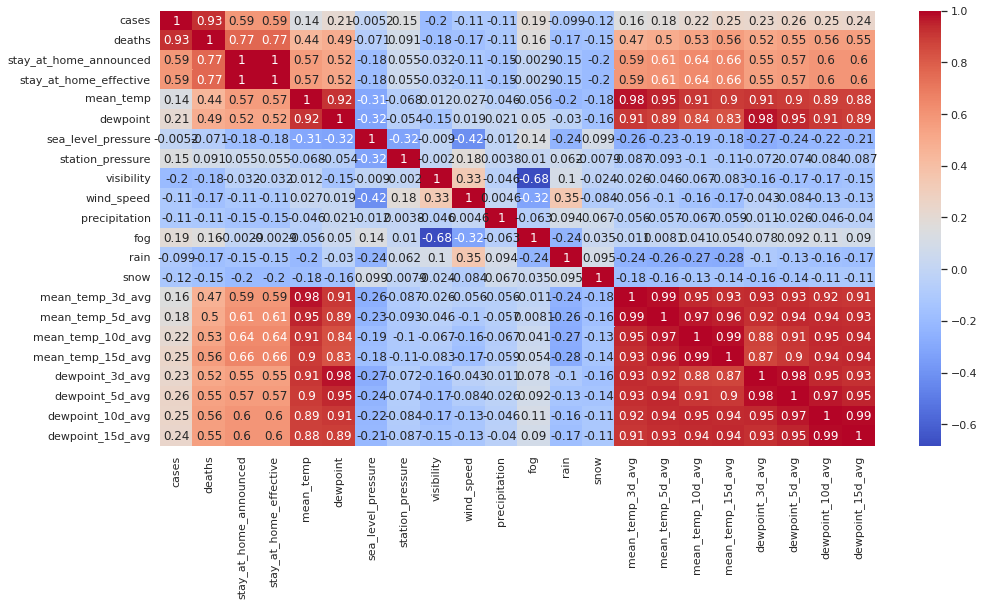

In [20]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [21]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                           cases    deaths  stay_at_home_announced  \
cases                   1.000000  0.926902                0.586744   
deaths                  0.926902  1.000000                0.767030   
stay_at_home_announced  0.586744  0.767030                1.000000   
stay_at_home_effective  0.586744  0.767030                1.000000   
mean_temp               0.136846  0.444634                0.567101   
dewpoint                0.212938  0.488660                0.524070   
sea_level_pressure      0.005243  0.070503                0.179464   
station_pressure        0.150244  0.090893                0.054713   
visibility              0.198659  0.181269                0.031972   
wind_speed              0.109153  0.166233                0.114378   
precipitation           0.106676  0.110803                0.148426   
fog                     0.188535  0.161362                0.002905   
rain                    0.098553  0.170329                0.147699   
snow                

In [22]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                        cases    deaths  stay_at_home_announced  \
cases                     NaN  0.926902                0.586744   
deaths                    NaN       NaN                0.767030   
stay_at_home_announced    NaN       NaN                     NaN   
stay_at_home_effective    NaN       NaN                     NaN   
mean_temp                 NaN       NaN                     NaN   
dewpoint                  NaN       NaN                     NaN   
sea_level_pressure        NaN       NaN                     NaN   
station_pressure          NaN       NaN                     NaN   
visibility                NaN       NaN                     NaN   
wind_speed                NaN       NaN                     NaN   
precipitation             NaN       NaN                     NaN   
fog                       NaN       NaN                     NaN   
rain                      NaN       NaN                     NaN   
snow                      NaN       NaN                     Na

<ipython-input-22-56dc5b2d0b9d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [23]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['stay_at_home_effective', 'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg', 'mean_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg', 'dewpoint_15d_avg']


In [24]:
df = df.drop(columns=['stay_at_home_effective', 'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg', 'mean_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg', 'dewpoint_15d_avg'])

In [25]:
test_split=round(len(df)*0.20)
df_for_training=df[:-63]
df_for_testing=df[-63:]
print(df_for_training.shape)
print(df_for_testing.shape)

(256, 13)
(63, 13)


In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.98671818, 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.99251389, 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.98672566, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [27]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_for_training_scaled,1)
testX,testY=createXY(df_for_testing_scaled,1)

In [28]:
trainXS = trainX
trainXB = trainX
trainYS = trainY
trainYB = trainY
testXS = testX
testXB = testX
testYS = testY
testYB = testY

In [29]:
trainX2=trainX3=trainX4=trainX5=trainX
trainY2=trainY3=trainY4=trainY5=trainY
testX2=testX3=testX4=testX5=testX
testY2=testY3=testY4=testY5=testY

In [30]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX Shape--  (255, 1, 13)
trainY Shape--  (255,)
testX Shape--  (62, 1, 13)
testY Shape--  (62,)
trainX[0]-- 
 [[0.         0.         0.         0.27990971 0.4940048  0.05329154
  0.         0.98888889 0.44171779 0.10194805 0.         1.
  0.        ]]
trainY[0]--  0.0


LSTM

1

In [31]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

<ipython-input-31-286fac1b7f4b>:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [32]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/50
15/15 [==============================] - 9s 63ms/step - loss: 0.3465 - val_loss: 1.1430
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0702 - val_loss: 0.2775
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0355 - val_loss: 0.5471
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.4187
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0219 - val_loss: 0.4349
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0199 - val_loss: 0.3868
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0178 - val_loss: 0.3872
Epoch 8/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.3162
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0150 - val_loss: 0.3325
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0114 - val_loss: 0.2743
Epoch 11/50
15/15

In [33]:
grid_search.best_params_

{'batch_size': 9, 'epochs': 100, 'optimizer': 'adam'}

In [34]:
my_model=grid_search.best_estimator_.model

In [35]:
prediction1=my_model.predict(testX)
print("prediction\n", prediction1)
print("\nPrediction Shape-",prediction1.shape)

2/2 [==============================] - 1s 7ms/step
prediction
 [[1.0329041]
 [1.0306277]
 [1.0441258]
 [1.0541642]
 [1.0529249]
 [1.057968 ]
 [1.0553092]
 [1.0541798]
 [1.0547754]
 [1.0805054]
 [1.0884565]
 [1.1040782]
 [1.1143401]
 [1.1344122]
 [1.1254319]
 [1.1299495]
 [1.1521486]
 [1.158261 ]
 [1.1770569]
 [1.1959748]
 [1.1972862]
 [1.2099133]
 [1.1887602]
 [1.2241634]
 [1.2329218]
 [1.2546175]
 [1.2648017]
 [1.2914562]
 [1.2826711]
 [1.28318  ]
 [1.3146498]
 [1.331019 ]
 [1.3525553]
 [1.3820062]
 [1.3808817]
 [1.3847759]
 [1.370932 ]
 [1.434456 ]
 [1.4848069]
 [1.4814569]
 [1.5143827]
 [1.5401812]
 [1.5499902]
 [1.5526254]
 [1.6557899]
 [1.6481444]
 [1.6907371]
 [1.7298117]
 [1.7846738]
 [1.7703644]
 [1.7468067]
 [1.8716979]
 [1.9475483]
 [1.9557326]
 [1.9676471]
 [1.9866585]
 [1.9760523]
 [1.9443986]
 [2.140757 ]
 [2.1877928]
 [2.2129107]
 [2.219184 ]]

Prediction Shape- (62, 1)


In [36]:
prediction_copies_array1 = np.repeat(prediction1,13, axis=-1)
prediction_copies_array1

array([[1.0329041, 1.0329041, 1.0329041, 1.0329041, 1.0329041, 1.0329041,
        1.0329041, 1.0329041, 1.0329041, 1.0329041, 1.0329041, 1.0329041,
        1.0329041],
       [1.0306277, 1.0306277, 1.0306277, 1.0306277, 1.0306277, 1.0306277,
        1.0306277, 1.0306277, 1.0306277, 1.0306277, 1.0306277, 1.0306277,
        1.0306277],
       [1.0441258, 1.0441258, 1.0441258, 1.0441258, 1.0441258, 1.0441258,
        1.0441258, 1.0441258, 1.0441258, 1.0441258, 1.0441258, 1.0441258,
        1.0441258],
       [1.0541642, 1.0541642, 1.0541642, 1.0541642, 1.0541642, 1.0541642,
        1.0541642, 1.0541642, 1.0541642, 1.0541642, 1.0541642, 1.0541642,
        1.0541642],
       [1.0529249, 1.0529249, 1.0529249, 1.0529249, 1.0529249, 1.0529249,
        1.0529249, 1.0529249, 1.0529249, 1.0529249, 1.0529249, 1.0529249,
        1.0529249],
       [1.057968 , 1.057968 , 1.057968 , 1.057968 , 1.057968 , 1.057968 ,
        1.057968 , 1.057968 , 1.057968 , 1.057968 , 1.057968 , 1.057968 ,
        1.05

In [37]:
prediction_copies_array1.shape
pred1=scaler.inverse_transform(np.reshape(prediction_copies_array1,(len(prediction1),13)))[:,0]
original_copies_array = np.repeat(testY,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),13)))[:,0]

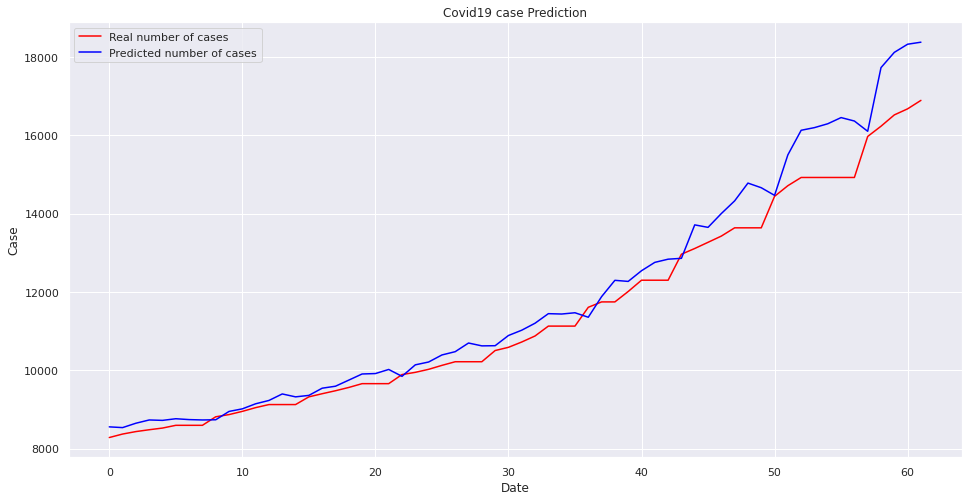

In [38]:
plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred1, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

2

In [39]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

<ipython-input-39-286fac1b7f4b>:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [40]:
grid_search = grid_search.fit(trainX2,trainY2)

Epoch 1/50
15/15 [==============================] - 4s 74ms/step - loss: 0.3654 - val_loss: 1.2204
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0729 - val_loss: 0.3181
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0406 - val_loss: 0.5507
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0265 - val_loss: 0.4850
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0211 - val_loss: 0.4556
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0186 - val_loss: 0.4445
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.4836
Epoch 8/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.3629
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.3997
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0140 - val_loss: 0.3540
Epoch 11/50
15/15 

In [41]:
grid_search.best_params_
my_model=grid_search.best_estimator_.model

In [42]:
prediction2=my_model.predict(testX2)
print("prediction\n", prediction2)
print("\nPrediction Shape-",prediction2.shape)

2/2 [==============================] - 1s 6ms/step
prediction
 [[0.987035 ]
 [0.9832142]
 [0.9944481]
 [1.0065914]
 [1.0068293]
 [1.0113678]
 [1.0270205]
 [1.0626276]
 [1.029639 ]
 [1.0517676]
 [1.061723 ]
 [1.0754097]
 [1.0826457]
 [1.1055553]
 [1.0933983]
 [1.1002343]
 [1.1185272]
 [1.1266112]
 [1.1474397]
 [1.143832 ]
 [1.1701031]
 [1.1564298]
 [1.1625254]
 [1.195087 ]
 [1.2007861]
 [1.2216678]
 [1.2308881]
 [1.2355869]
 [1.2287638]
 [1.2287133]
 [1.2600398]
 [1.304039 ]
 [1.3208089]
 [1.3539224]
 [1.3494413]
 [1.3219361]
 [1.3468645]
 [1.4062581]
 [1.4560499]
 [1.4244175]
 [1.4832239]
 [1.5583344]
 [1.5218954]
 [1.5221322]
 [1.6228487]
 [1.6270363]
 [1.705656 ]
 [1.7002113]
 [1.7569234]
 [1.7352746]
 [1.711489 ]
 [1.8377273]
 [1.9197159]
 [1.921711 ]
 [1.93325  ]
 [1.959732 ]
 [1.9449096]
 [1.8844707]
 [2.1145082]
 [2.1265962]
 [2.1545   ]
 [2.1921654]]

Prediction Shape- (62, 1)


In [43]:
prediction_copies_array2 = np.repeat(prediction2,13, axis=-1)
prediction_copies_array2

array([[0.987035 , 0.987035 , 0.987035 , 0.987035 , 0.987035 , 0.987035 ,
        0.987035 , 0.987035 , 0.987035 , 0.987035 , 0.987035 , 0.987035 ,
        0.987035 ],
       [0.9832142, 0.9832142, 0.9832142, 0.9832142, 0.9832142, 0.9832142,
        0.9832142, 0.9832142, 0.9832142, 0.9832142, 0.9832142, 0.9832142,
        0.9832142],
       [0.9944481, 0.9944481, 0.9944481, 0.9944481, 0.9944481, 0.9944481,
        0.9944481, 0.9944481, 0.9944481, 0.9944481, 0.9944481, 0.9944481,
        0.9944481],
       [1.0065914, 1.0065914, 1.0065914, 1.0065914, 1.0065914, 1.0065914,
        1.0065914, 1.0065914, 1.0065914, 1.0065914, 1.0065914, 1.0065914,
        1.0065914],
       [1.0068293, 1.0068293, 1.0068293, 1.0068293, 1.0068293, 1.0068293,
        1.0068293, 1.0068293, 1.0068293, 1.0068293, 1.0068293, 1.0068293,
        1.0068293],
       [1.0113678, 1.0113678, 1.0113678, 1.0113678, 1.0113678, 1.0113678,
        1.0113678, 1.0113678, 1.0113678, 1.0113678, 1.0113678, 1.0113678,
        1.01

In [44]:
prediction_copies_array2.shape
pred2=scaler.inverse_transform(np.reshape(prediction_copies_array2,(len(prediction2),13)))[:,0]
original_copies_array = np.repeat(testY2,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY2),13)))[:,0]

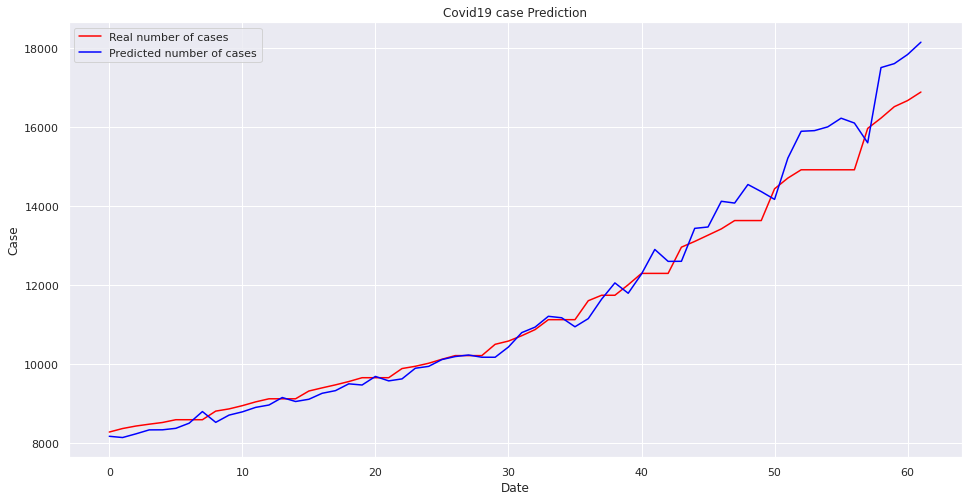

In [45]:
plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred2, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

3

<ipython-input-46-da6d5e2ed900>:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


Epoch 1/50
15/15 [==============================] - 3s 57ms/step - loss: 0.3662 - val_loss: 1.1954
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0786 - val_loss: 0.2848
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0444 - val_loss: 0.5486
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0276 - val_loss: 0.4128
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.4450
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0186 - val_loss: 0.3893
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.3771
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.3584
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.2992
Epoch 10/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0125 - val_loss: 0.3405
Epoch 11/50
15/15 

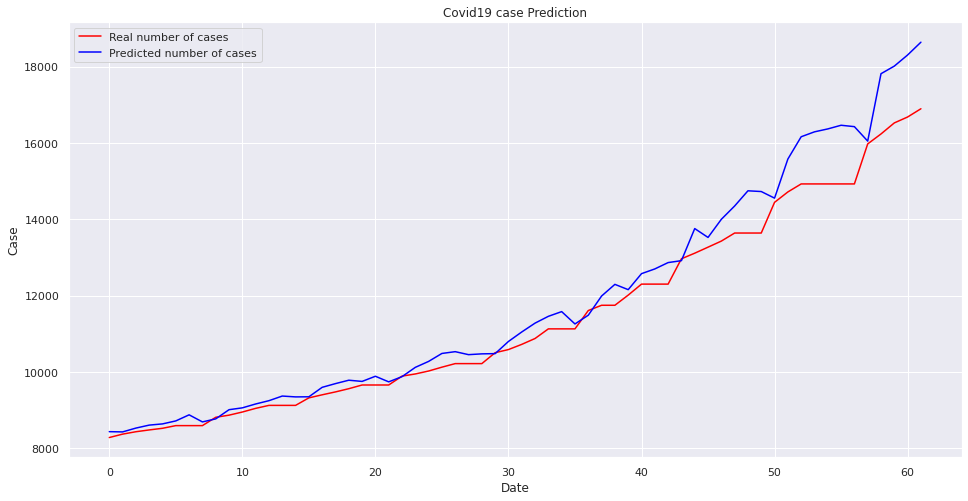

In [46]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

grid_search = grid_search.fit(trainX3,trainY3)

grid_search.best_params_
my_model=grid_search.best_estimator_.model

prediction3=my_model.predict(testX3)
print("prediction\n", prediction3)
print("\nPrediction Shape-",prediction3.shape)

prediction_copies_array3 = np.repeat(prediction3,13, axis=-1)
prediction_copies_array3

prediction_copies_array3.shape
pred3=scaler.inverse_transform(np.reshape(prediction_copies_array3,(len(prediction3),13)))[:,0]
original_copies_array = np.repeat(testY3,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY3),13)))[:,0]

plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred3, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

4

<ipython-input-47-ad366251e794>:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


Epoch 1/50
15/15 [==============================] - 4s 59ms/step - loss: 0.3417 - val_loss: 1.1620
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0734 - val_loss: 0.3268
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: 0.5638
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0263 - val_loss: 0.4704
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.4929
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.3941
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.4175
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0151 - val_loss: 0.3873
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0146 - val_loss: 0.3595
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0126 - val_loss: 0.3515
Epoch 11/50
15/15 

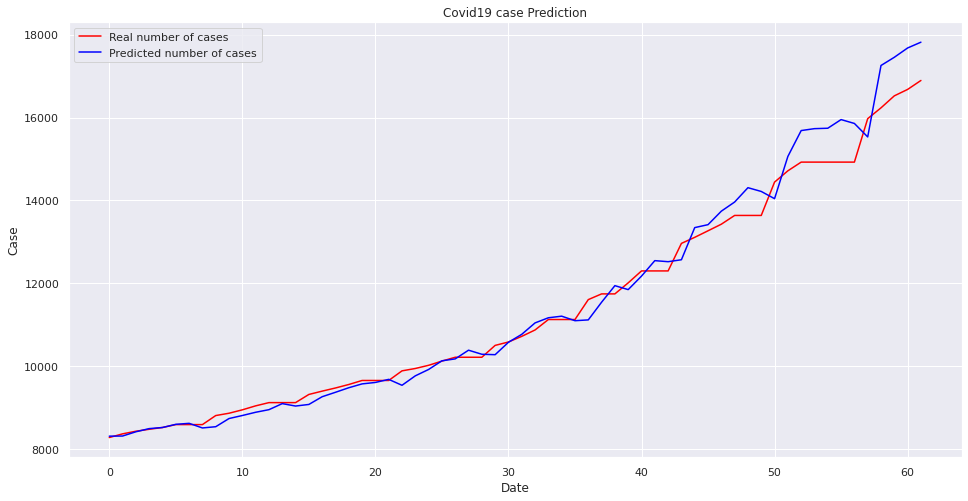

In [47]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

grid_search = grid_search.fit(trainX4,trainY4)

grid_search.best_params_
my_model=grid_search.best_estimator_.model

prediction4=my_model.predict(testX4)
print("prediction\n", prediction4)
print("\nPrediction Shape-",prediction4.shape)

prediction_copies_array4 = np.repeat(prediction4,13, axis=-1)
prediction_copies_array4

prediction_copies_array4.shape
pred4=scaler.inverse_transform(np.reshape(prediction_copies_array4,(len(prediction4),13)))[:,0]
original_copies_array = np.repeat(testY4,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY4),13)))[:,0]

plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred4, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

5

<ipython-input-48-551609faa518>:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


Epoch 1/50
15/15 [==============================] - 4s 59ms/step - loss: 0.3448 - val_loss: 1.1086
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0620 - val_loss: 0.2652
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0441 - val_loss: 0.5509
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0269 - val_loss: 0.3922
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0233 - val_loss: 0.4205
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.4106
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0188 - val_loss: 0.3797
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.3411
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.3544
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0124 - val_loss: 0.2932
Epoch 11/50
15/15

2/2 [==============================] - 1s 4ms/step
prediction
 [[0.9978851]
 [0.9956218]
 [1.0073483]
 [1.0172191]
 [1.0183849]
 [1.0242558]
 [1.0317838]
 [1.023218 ]
 [1.0254296]
 [1.0532682]
 [1.0593623]
 [1.0765228]
 [1.0899864]
 [1.1029919]
 [1.0954565]
 [1.1001159]
 [1.1235766]
 [1.135347 ]
 [1.1478517]
 [1.151762 ]
 [1.1633861]
 [1.1606507]
 [1.1629395]
 [1.194095 ]
 [1.2075757]
 [1.2278137]
 [1.2340884]
 [1.2409879]
 [1.2353541]
 [1.2353112]
 [1.2698356]
 [1.2934669]
 [1.3088936]
 [1.3407195]
 [1.3490319]
 [1.3302691]
 [1.3399776]
 [1.4048233]
 [1.4405282]
 [1.4266644]
 [1.4737955]
 [1.4882678]
 [1.5043869]
 [1.5077091]
 [1.6109858]
 [1.5949372]
 [1.640496 ]
 [1.6795118]
 [1.7346568]
 [1.7259865]
 [1.7050542]
 [1.8208537]
 [1.8912492]
 [1.9049065]
 [1.9223802]
 [1.9317704]
 [1.9260355]
 [1.87634  ]
 [2.0826933]
 [2.114356 ]
 [2.1393533]
 [2.1779683]]

Prediction Shape- (62, 1)


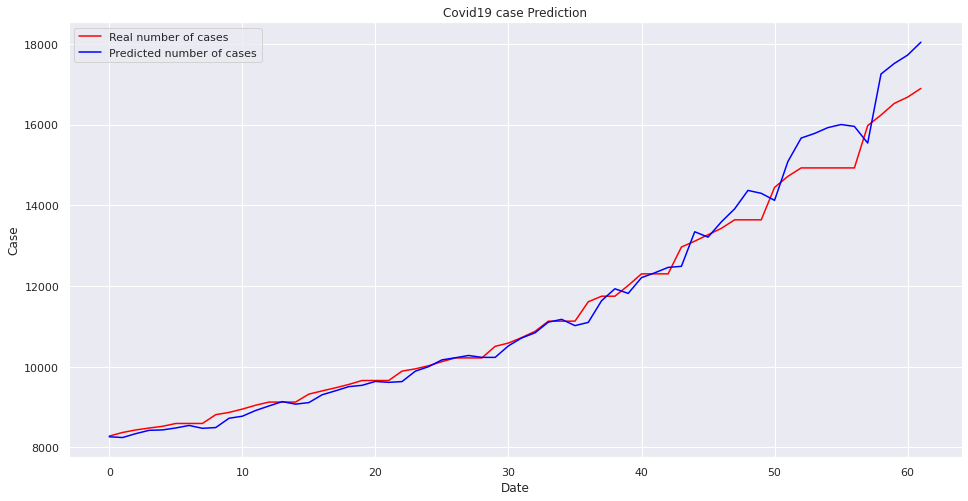

In [48]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(96,return_sequences=True,input_shape=(1,13)))
    grid_model.add(LSTM(96))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

parameters = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

grid_search = grid_search.fit(trainX5,trainY5)

grid_search.best_params_
my_model=grid_search.best_estimator_.model

prediction5=my_model.predict(testX5)
print("prediction\n", prediction5)
print("\nPrediction Shape-",prediction5.shape)

prediction_copies_array5 = np.repeat(prediction5,13, axis=-1)
prediction_copies_array5

prediction_copies_array5.shape
pred5=scaler.inverse_transform(np.reshape(prediction_copies_array5,(len(prediction5),13)))[:,0]
original_copies_array = np.repeat(testY5,13, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY5),13)))[:,0]

plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(pred5, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

Average of 5 LSTM runs

In [49]:
predlstm = (pred1+pred2+pred3+pred4+pred5)/5
print(predlstm)

[ 8349.869   8335.419   8436.314   8520.233   8532.221   8588.8125
  8659.417   8643.043   8614.834   8827.819   8891.771   9004.643
  9085.781   9231.904   9168.323   9203.085   9395.916   9479.752
  9605.824   9649.916   9748.832   9728.136   9705.635   9964.07
 10072.329  10259.807  10320.93   10410.563  10359.901  10359.744
 10644.525  10871.717  11062.186  11278.842  11315.744  11159.043
 11243.213  11739.941  12105.971  11978.256  12357.19   12647.628
 12658.47   12688.115  13520.028  13455.525  13891.799  14125.948
 14550.869  14454.927  14272.432  15288.45   15908.3    15982.722
 16067.802  16219.658  16142.094  15766.57   17512.22   17741.926
 17974.363  18206.05  ]


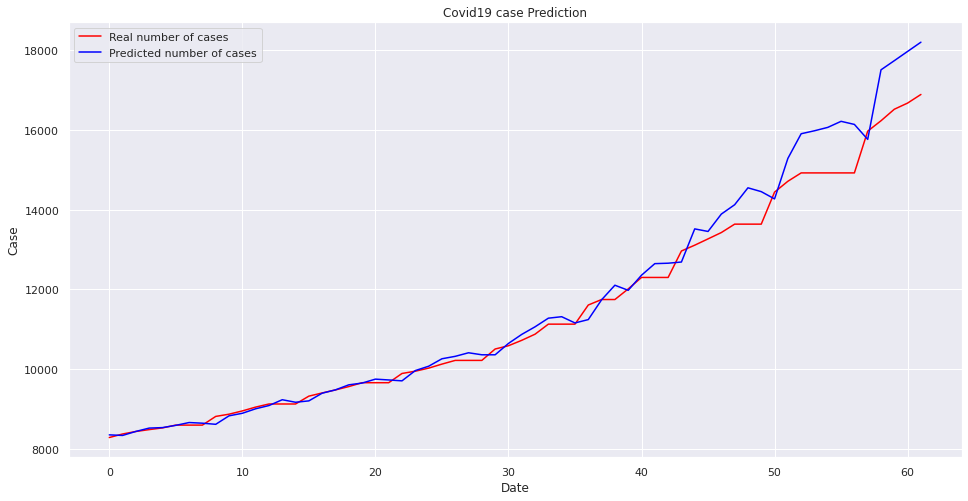

In [50]:
plt.plot(original, color = 'red', label = 'Real number of cases')
plt.plot(predlstm, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [51]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(original, predlstm)))
print("MAE:",metrics.mean_absolute_error(original, predlstm))
print("MSE:",metrics.mean_squared_error(original, predlstm))
print("MAPE: ",MAPE(original,predlstm))

forecast_errors = [original[i]-predlstm[i] for i in range(len(original))]
print('Forecast Errors: %s' % forecast_errors)
bias = sum(forecast_errors) * 1.0/len(original)
print('Bias: %f' % bias)

print("std of LSTM : ", np.std(predlstm))

RMSE : 517.1
MAE: 317.54136214717744
MSE: 267407.7129881459
MAPE:  2.3137654962821297
Forecast Errors: [-66.869140625, 36.5810546875, -1.314453125, -38.2333984375, -7.220703125, 6.1875, -64.4169921875, -48.04296875, 198.166015625, 41.1806640625, 59.228515625, 42.357421875, 39.21875, -106.904296875, -43.3232421875, 118.9150390625, 6.083984375, -1.751953125, -43.82421875, 9.083984375, -89.83203125, -69.1357421875, 185.365234375, -16.0703125, -47.3291015625, -133.806640625, -101.9296875, -191.5634765625, -140.9013671875, 145.255859375, -57.525390625, -148.716796875, -185.185546875, -149.841796875, -186.744140625, -30.04296875, 365.787109375, 7.05859375, -358.970703125, 34.744140625, -56.1904296875, -346.6279296875, -357.4697265625, 276.884765625, -409.0283203125, -186.525390625, -463.798828125, -486.9482421875, -911.869140625, -815.9267578125, 170.568359375, -573.4501953125, -983.2998046875, -1057.7216796875, -1142.8017578125, -1294.658203125, -1217.09375, 206.4296875, -1278.220703125, -1

Stacked LSTM

1

In [52]:
trainXS2=trainXS3=trainXS4=trainXS5=trainXS
trainYS2=trainYS3=trainYS4=trainYS5=trainYS
testXS2=testXS3=testXS4=testXS5=testXS
testYS2=testYS3=testYS4=testYS5=testYS

In [53]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)


<ipython-input-53-ce2761bffdd0>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))


In [54]:
grid_search_S = grid_search.fit(trainXS,trainYS)

Epoch 1/50
15/15 [==============================] - 3s 56ms/step - loss: 0.3429 - val_loss: 1.1278
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0600 - val_loss: 0.2660
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0421 - val_loss: 0.5774
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0329 - val_loss: 0.4689
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.4302
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.4330
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0169 - val_loss: 0.3946
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0163 - val_loss: 0.3770
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0161 - val_loss: 0.3700
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0145 - val_loss: 0.3013
Epoch 11/50
15/15 

In [55]:
grid_search_S.best_params_

{'batch_size': 11, 'epochs': 100, 'optimizer': 'adam'}

2/2 [==============================] - 1s 8ms/step
prediction
 [[1.019607 ]
 [1.0225134]
 [1.0373352]
 [1.0463557]
 [1.0464813]
 [1.0554302]
 [1.0789812]
 [1.0752717]
 [1.0845662]
 [1.1023904]
 [1.115383 ]
 [1.1266983]
 [1.1294576]
 [1.1552987]
 [1.1398884]
 [1.1472204]
 [1.1657331]
 [1.179032 ]
 [1.2023777]
 [1.1999516]
 [1.2280551]
 [1.2185525]
 [1.2201846]
 [1.249982 ]
 [1.2547995]
 [1.2766033]
 [1.2849753]
 [1.3030611]
 [1.2916315]
 [1.2882715]
 [1.319667 ]
 [1.3671558]
 [1.3985661]
 [1.4179351]
 [1.4206734]
 [1.381382 ]
 [1.4184835]
 [1.4740522]
 [1.5243193]
 [1.4861988]
 [1.5497739]
 [1.594313 ]
 [1.5945455]
 [1.5946122]
 [1.6934193]
 [1.6607057]
 [1.7390558]
 [1.7779757]
 [1.8290086]
 [1.8114971]
 [1.7809557]
 [1.9083649]
 [1.996971 ]
 [1.9944001]
 [1.9989992]
 [2.0332298]
 [2.0142324]
 [1.9542607]
 [2.1913342]
 [2.2094624]
 [2.2326672]
 [2.2683964]]

Prediction Shape- (62, 1)
Pred Values--  [ 8445.385   8469.456   8592.21    8666.918   8667.958   8742.073
  8937.122   8906.4   

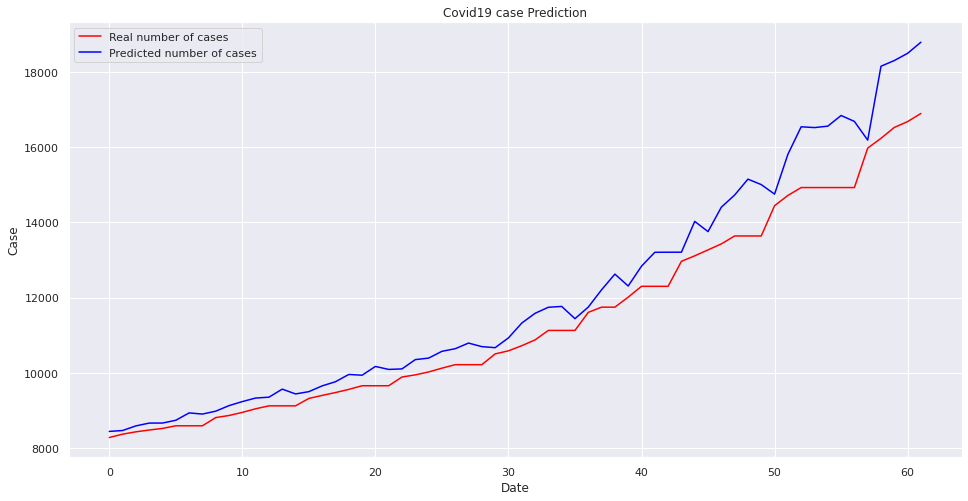

In [56]:
my_s_model=grid_search_S.best_estimator_.model

predictionS1 =my_s_model.predict(testXS)
print("prediction\n", predictionS1)
print("\nPrediction Shape-",predictionS1.shape)

prediction_copies_array_S1 = np.repeat(predictionS1,13, axis=-1)
prediction_copies_array_S1

predS1=scaler.inverse_transform(np.reshape(prediction_copies_array_S1,(len(predictionS1),13)))[:,0]

original_copies_array_S = np.repeat(testYS,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS),13)))[:,0]

print("Pred Values-- " ,predS1)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS1, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

2

<ipython-input-57-7aca791b9ec4>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))


Epoch 1/50
15/15 [==============================] - 5s 63ms/step - loss: 0.3674 - val_loss: 1.2446
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0844 - val_loss: 0.3508
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0373 - val_loss: 0.5472
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0292 - val_loss: 0.4631
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0208 - val_loss: 0.4512
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0170 - val_loss: 0.4170
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0166 - val_loss: 0.4170
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0170 - val_loss: 0.3593
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0148 - val_loss: 0.3799
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0125 - val_loss: 0.2838
Epoch 11/50
15/15 

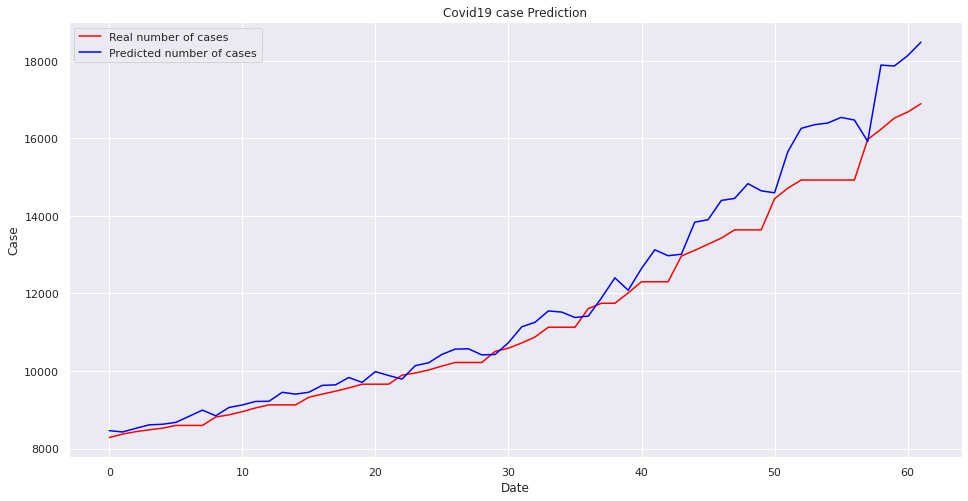

In [57]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS2,trainYS2)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS2 =my_s_model.predict(testXS2)
print("prediction\n", predictionS2)
print("\nPrediction Shape-",predictionS2.shape)

prediction_copies_array_S2 = np.repeat(predictionS2,13, axis=-1)
prediction_copies_array_S2

predS2=scaler.inverse_transform(np.reshape(prediction_copies_array_S2,(len(predictionS2),13)))[:,0]

original_copies_array_S = np.repeat(testYS2,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS2),13)))[:,0]

print("Pred Values-- " ,predS2)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS2, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

3

<ipython-input-58-46fd1b4b3d03>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))


Epoch 1/50
15/15 [==============================] - 4s 56ms/step - loss: 0.3438 - val_loss: 1.1000
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0572 - val_loss: 0.2818
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0331 - val_loss: 0.5536
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0254 - val_loss: 0.4081
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0187 - val_loss: 0.4489
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0173 - val_loss: 0.3799
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0144 - val_loss: 0.3748
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0136 - val_loss: 0.3346
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0112 - val_loss: 0.3161
Epoch 10/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0119 - val_loss: 0.2891
Epoch 11/50
15/15 

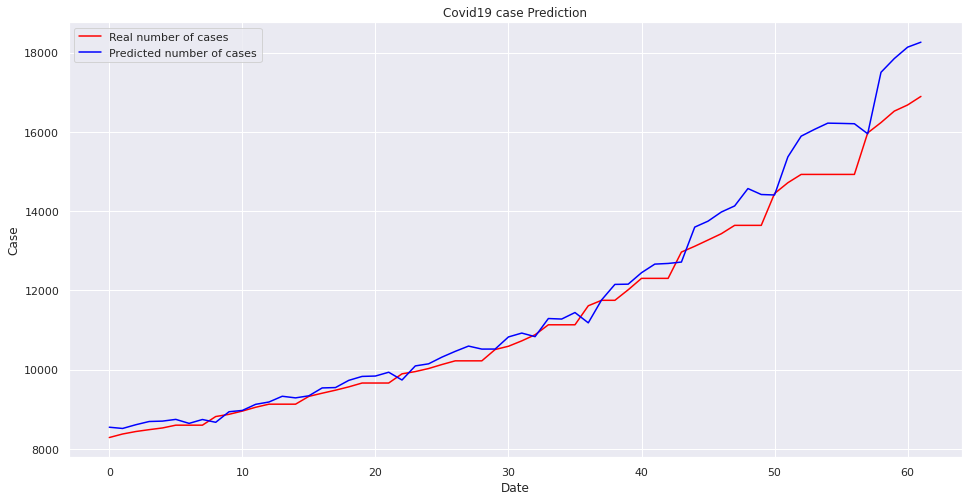

In [58]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS3,trainYS3)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS3 =my_s_model.predict(testXS3)
print("prediction\n", predictionS3)
print("\nPrediction Shape-",predictionS3.shape)

prediction_copies_array_S3 = np.repeat(predictionS3,13, axis=-1)
prediction_copies_array_S3

predS3=scaler.inverse_transform(np.reshape(prediction_copies_array_S3,(len(predictionS3),13)))[:,0]

original_copies_array_S = np.repeat(testYS3,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS3),13)))[:,0]

print("Pred Values-- " ,predS3)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS3, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

4

<ipython-input-59-387ebbc89abe>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))


Epoch 1/50
15/15 [==============================] - 3s 56ms/step - loss: 0.3504 - val_loss: 1.1449
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0727 - val_loss: 0.2898
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0313 - val_loss: 0.5290
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.4094
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0189 - val_loss: 0.4096
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.3801
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0153 - val_loss: 0.3480
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0147 - val_loss: 0.3250
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0144 - val_loss: 0.3158
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0129 - val_loss: 0.2778
Epoch 11/50
15/15 

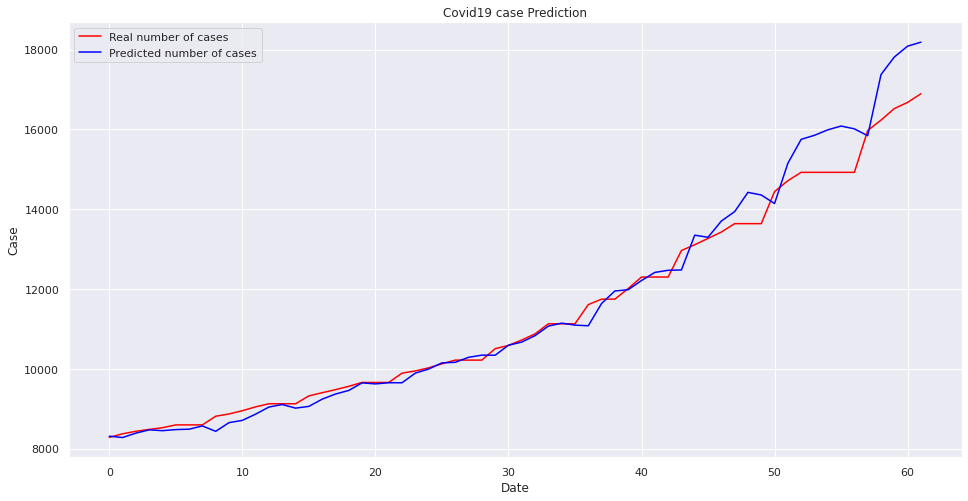

In [59]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS4,trainYS4)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS4 =my_s_model.predict(testXS4)
print("prediction\n", predictionS4)
print("\nPrediction Shape-",predictionS4.shape)

prediction_copies_array_S4 = np.repeat(predictionS4,13, axis=-1)
prediction_copies_array_S4

predS4=scaler.inverse_transform(np.reshape(prediction_copies_array_S4,(len(predictionS4),13)))[:,0]

original_copies_array_S = np.repeat(testYS4,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS4),13)))[:,0]

print("Pred Values-- " ,predS4)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS4, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

5

<ipython-input-60-1f0e20a05838>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))


Epoch 1/50
15/15 [==============================] - 3s 57ms/step - loss: 0.3517 - val_loss: 1.1640
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0580 - val_loss: 0.2896
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0438 - val_loss: 0.5777
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0248 - val_loss: 0.4540
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0209 - val_loss: 0.4930
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0204 - val_loss: 0.4553
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0171 - val_loss: 0.3936
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.4004
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0155 - val_loss: 0.3498
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0139 - val_loss: 0.3466
Epoch 11/50
15/15 

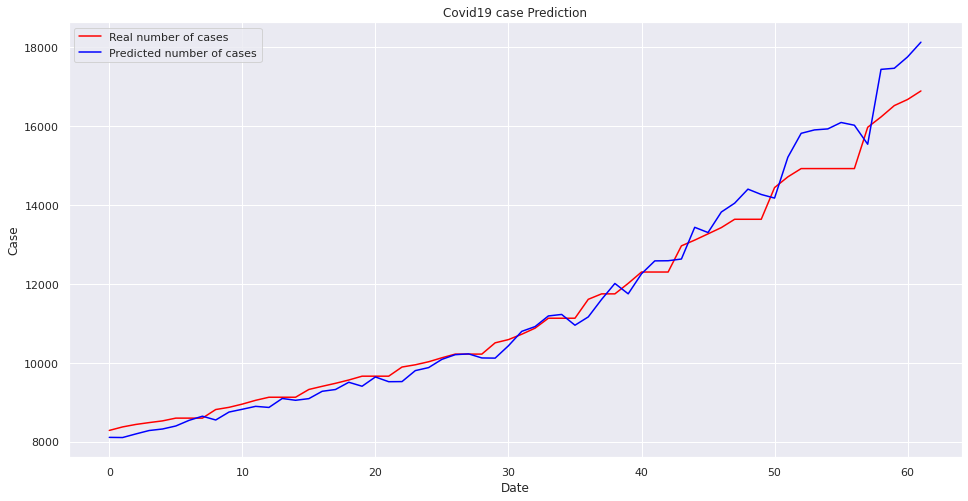

In [60]:
def build_s_model(optimizer):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=(1,13)))
    model.add(LSTM(96, return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(16))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer= optimizer)
    return model

grid_model_S = KerasRegressor(build_fn=build_s_model,verbose=1,validation_data=(testXS,testYS))

parameterS = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_S  = GridSearchCV(estimator = grid_model_S,
                            param_grid = parameterS,
                            cv = 2)

grid_search_S = grid_search.fit(trainXS5,trainYS5)

grid_search_S.best_params_

my_s_model=grid_search_S.best_estimator_.model

predictionS5 =my_s_model.predict(testXS5)
print("prediction\n", predictionS5)
print("\nPrediction Shape-",predictionS5.shape)

prediction_copies_array_S5 = np.repeat(predictionS5,13, axis=-1)
prediction_copies_array_S5

predS5=scaler.inverse_transform(np.reshape(prediction_copies_array_S5,(len(predictionS5),13)))[:,0]

original_copies_array_S = np.repeat(testYS5,13, axis=-1)
originalS=scaler.inverse_transform(np.reshape(original_copies_array_S,(len(testYS5),13)))[:,0]

print("Pred Values-- " ,predS5)
print("\nOriginal Values-- " ,originalS)

plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predS5, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

Average of 5 Stacked-LSTM runs

In [61]:
predslstm = (predS1+predS2+predS3+predS4+predS5)/5
print(predslstm)

[ 8373.8125  8357.81    8460.59    8543.408   8552.039   8606.148
  8686.991   8769.249   8695.317   8904.925   8971.432   9085.156
  9132.379   9308.629   9238.201   9287.908   9466.844   9528.26
  9696.244   9704.407   9850.42    9815.505   9761.072  10054.986
 10123.857  10309.861  10406.74   10494.018  10418.784  10414.107
 10701.047  10969.942  11083.737  11367.602  11386.015  11261.286
 11317.043  11819.372  12227.791  12055.638  12478.344  12798.193
 12782.811  12808.173  13648.987  13600.057  14061.047  14258.768
 14675.002  14538.787  14414.503  15439.318  16051.997  16138.169
 16218.58   16354.492  16279.817  15889.146  17671.73   17860.178
 18121.633  18369.953 ]


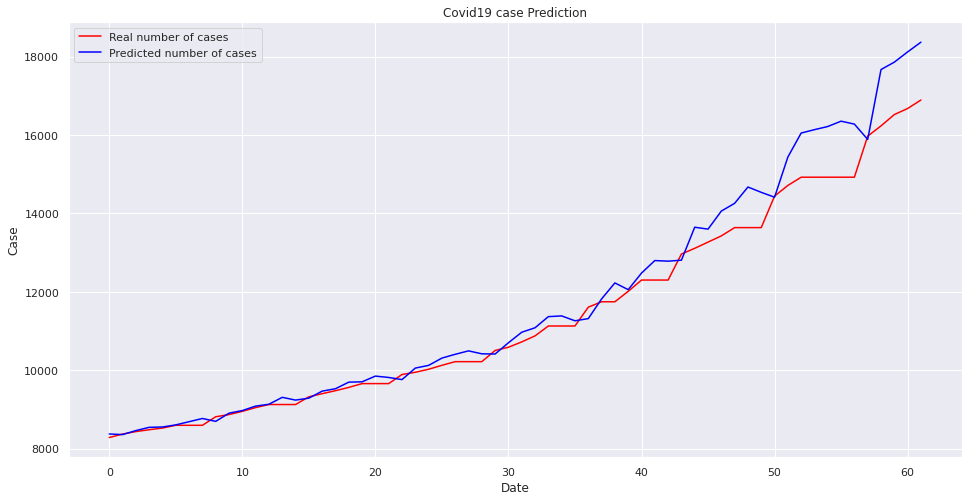

In [62]:
plt.plot(originalS, color = 'red', label = 'Real number of cases')
plt.plot(predslstm, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [63]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(originalS, predslstm)))
print("MAE:",metrics.mean_absolute_error(originalS, predslstm))
print("MSE:",metrics.mean_squared_error(originalS, predslstm))
print("MAPE: ",MAPE(originalS,predslstm))

forecast_errors = [originalS[i]-predslstm[i] for i in range(len(originalS))]
print('Forecast Errors: %s' % forecast_errors)
bias = sum(forecast_errors) * 1.0/len(originalS)
print('Bias: %f' % bias)

print("std of LSTM : ", np.std(predslstm))

RMSE : 589.7
MAE: 376.87257434475805
MSE: 347797.22951876733
MAPE:  2.795371837365329
Forecast Errors: [-90.8125, 14.1904296875, -25.58984375, -61.408203125, -27.0390625, -11.1484375, -91.9912109375, -174.2490234375, 117.6826171875, -35.9248046875, -20.431640625, -38.15625, -7.37890625, -183.62890625, -113.201171875, 34.091796875, -64.84375, -50.259765625, -134.244140625, -45.4072265625, -191.419921875, -156.5048828125, 129.927734375, -106.986328125, -98.857421875, -183.861328125, -187.740234375, -275.017578125, -199.7841796875, 90.892578125, -114.046875, -246.9423828125, -206.7373046875, -238.6015625, -257.0146484375, -132.2861328125, 291.95703125, -72.3720703125, -480.791015625, -42.6376953125, -177.34375, -497.193359375, -481.810546875, 156.8271484375, -537.9873046875, -331.056640625, -633.046875, -619.767578125, -1036.001953125, -899.787109375, 28.4970703125, -724.318359375, -1126.9970703125, -1213.1689453125, -1293.580078125, -1429.4921875, -1354.8173828125, 83.853515625, -1437.73

Bidirectional LSTM

1

In [64]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [65]:
trainXB2=trainXB3=trainXB4=trainXB5=trainXB
trainYB2=trainYB3=trainYB4=trainYB5=trainYB
testXB2=testXB3=testXB4=testXB5=testXB
testYB2=testYB3=testYB4=testYB5=testYB

In [66]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)



<ipython-input-66-59acb5f995a7>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))


In [67]:
grid_search_B = grid_search.fit(trainXB,trainYB)

Epoch 1/50
15/15 [==============================] - 3s 57ms/step - loss: 0.3541 - val_loss: 1.1259
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0686 - val_loss: 0.2990
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0365 - val_loss: 0.5260
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.4445
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.4352
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0166 - val_loss: 0.3932
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0153 - val_loss: 0.3490
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.3633
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0134 - val_loss: 0.3050
Epoch 10/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0126 - val_loss: 0.3072
Epoch 11/50
15/15 

In [68]:
grid_search_B.best_params_

{'batch_size': 9, 'epochs': 100, 'optimizer': 'adam'}

2/2 [==============================] - 1s 7ms/step
prediction
 [[0.9964713]
 [1.0022315]
 [1.0201159]
 [1.0231483]
 [1.0210917]
 [1.0316526]
 [1.0425041]
 [1.0469477]
 [1.0421269]
 [1.0678471]
 [1.0757289]
 [1.09744  ]
 [1.1092322]
 [1.1223766]
 [1.1063206]
 [1.1102914]
 [1.137518 ]
 [1.150683 ]
 [1.167162 ]
 [1.1738199]
 [1.1819876]
 [1.1758958]
 [1.1857464]
 [1.2189924]
 [1.227933 ]
 [1.2451789]
 [1.2537946]
 [1.2597755]
 [1.2634525]
 [1.257548 ]
 [1.2907583]
 [1.3128052]
 [1.326442 ]
 [1.3628722]
 [1.3642805]
 [1.3372564]
 [1.35598  ]
 [1.426191 ]
 [1.4611971]
 [1.4473671]
 [1.495142 ]
 [1.5270859]
 [1.5255008]
 [1.527198 ]
 [1.6321776]
 [1.6259799]
 [1.6784105]
 [1.7050062]
 [1.7673243]
 [1.7555144]
 [1.7268431]
 [1.8376883]
 [1.9154963]
 [1.9244553]
 [1.9477552]
 [1.960229 ]
 [1.9499326]
 [1.9098692]
 [2.1024485]
 [2.166423 ]
 [2.1847906]
 [2.2009244]]

Prediction Shape- (62, 1)
Pred Values--  [ 8253.775   8301.481   8449.6     8474.714   8457.682   8545.146
  8635.019   8671.821 

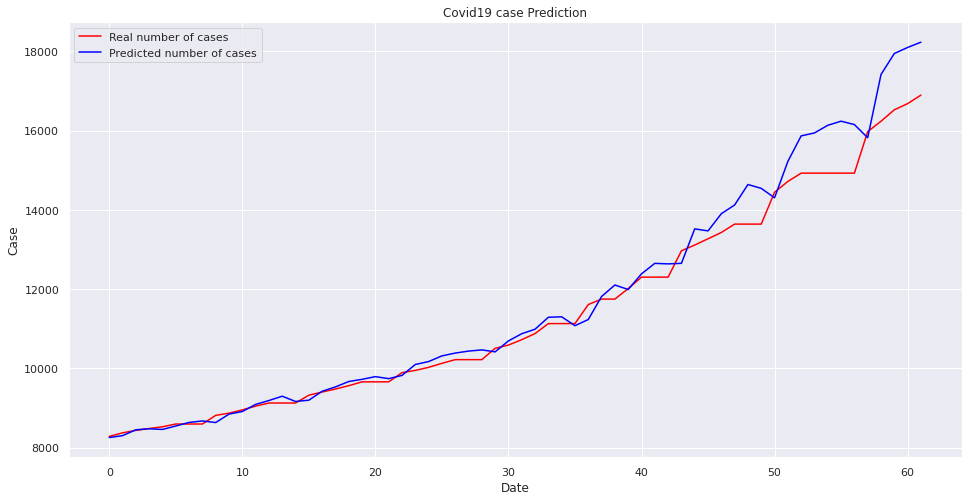

In [69]:
my_B_model=grid_search_B.best_estimator_.model

predictionB1 =my_B_model.predict(testXB)
print("prediction\n", predictionB1)
print("\nPrediction Shape-",predictionB1.shape)

prediction_copies_array_B1 = np.repeat(predictionB1,13, axis=-1)
prediction_copies_array_B1

predB1 =scaler.inverse_transform(np.reshape(prediction_copies_array_B1,(len(predictionB1),13)))[:,0]

original_copies_array_B = np.repeat(testYB,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB),13)))[:,0]

print("Pred Values-- " ,predB1)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB1, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

2

<ipython-input-70-aa3b24f8fba0>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))


Epoch 1/50
15/15 [==============================] - 4s 58ms/step - loss: 0.3689 - val_loss: 1.1909
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0762 - val_loss: 0.2796
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0357 - val_loss: 0.5225
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0246 - val_loss: 0.4006
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0218 - val_loss: 0.4306
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0197 - val_loss: 0.3727
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.3777
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0155 - val_loss: 0.3305
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0130 - val_loss: 0.3676
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0136 - val_loss: 0.2639
Epoch 11/50
15/15 

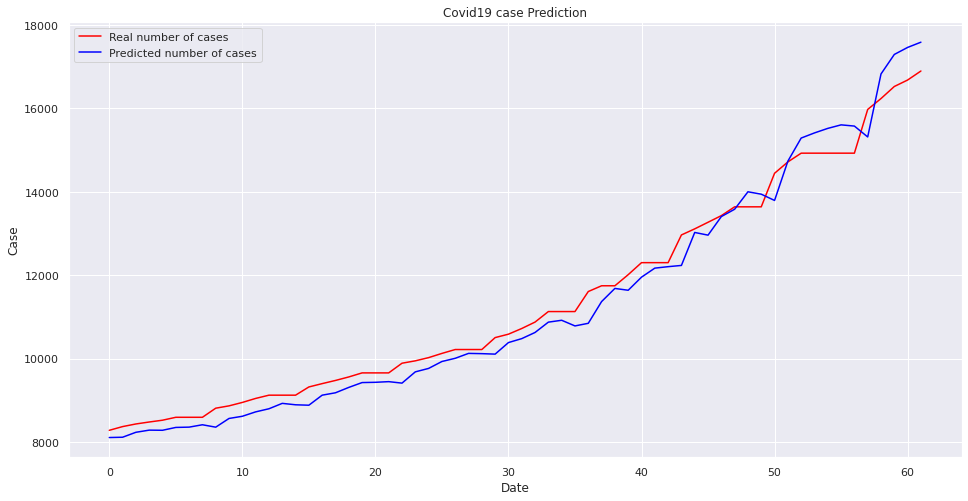

In [70]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB2,trainYB2)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB2 =my_B_model.predict(testXB2)
print("prediction\n", predictionB2)
print("\nPrediction Shape-",predictionB2.shape)

prediction_copies_array_B2 = np.repeat(predictionB2,13, axis=-1)
prediction_copies_array_B2

predB2 =scaler.inverse_transform(np.reshape(prediction_copies_array_B2,(len(predictionB2),13)))[:,0]

original_copies_array_B = np.repeat(testYB2,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB2),13)))[:,0]

print("Pred Values-- " ,predB2)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB2, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

3

<ipython-input-71-16cf57565700>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))


Epoch 1/50
15/15 [==============================] - 4s 56ms/step - loss: 0.3498 - val_loss: 1.1832
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0764 - val_loss: 0.3322
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0376 - val_loss: 0.5458
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0283 - val_loss: 0.4806
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.4706
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0215 - val_loss: 0.4316
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.4232
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0173 - val_loss: 0.3580
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0158 - val_loss: 0.3738
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0137 - val_loss: 0.3325
Epoch 11/50
15/15 

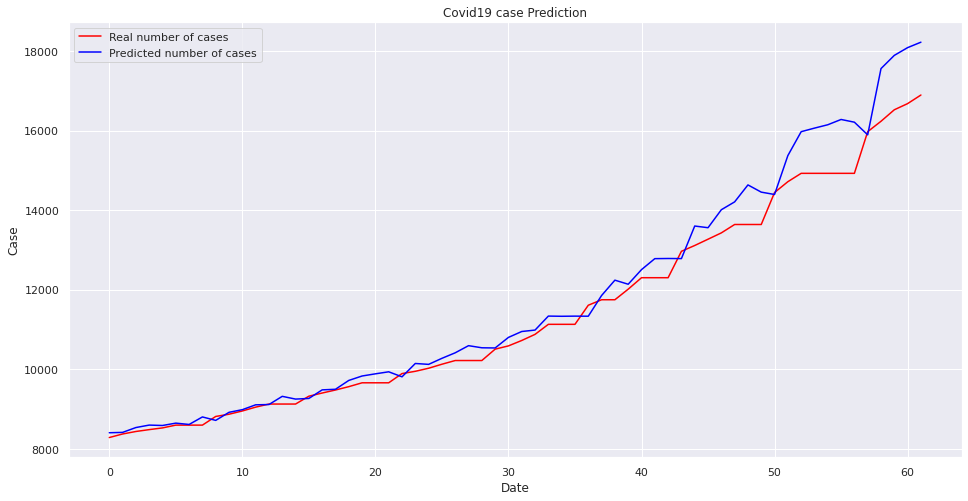

In [71]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB3,trainYB3)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB3 =my_B_model.predict(testXB3)
print("prediction\n", predictionB3)
print("\nPrediction Shape-",predictionB3.shape)

prediction_copies_array_B3 = np.repeat(predictionB3,13, axis=-1)
prediction_copies_array_B3

predB3 =scaler.inverse_transform(np.reshape(prediction_copies_array_B3,(len(predictionB3),13)))[:,0]

original_copies_array_B = np.repeat(testYB3,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB3),13)))[:,0]

print("Pred Values-- " ,predB3)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB3, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

4

<ipython-input-72-258b806065bb>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))


Epoch 1/50
15/15 [==============================] - 4s 56ms/step - loss: 0.3611 - val_loss: 1.1958
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0704 - val_loss: 0.2948
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0392 - val_loss: 0.5101
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0248 - val_loss: 0.4505
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 0.4268
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0180 - val_loss: 0.4056
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0175 - val_loss: 0.3842
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.3528
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0148 - val_loss: 0.3536
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0120 - val_loss: 0.3033
Epoch 11/50
15/15 

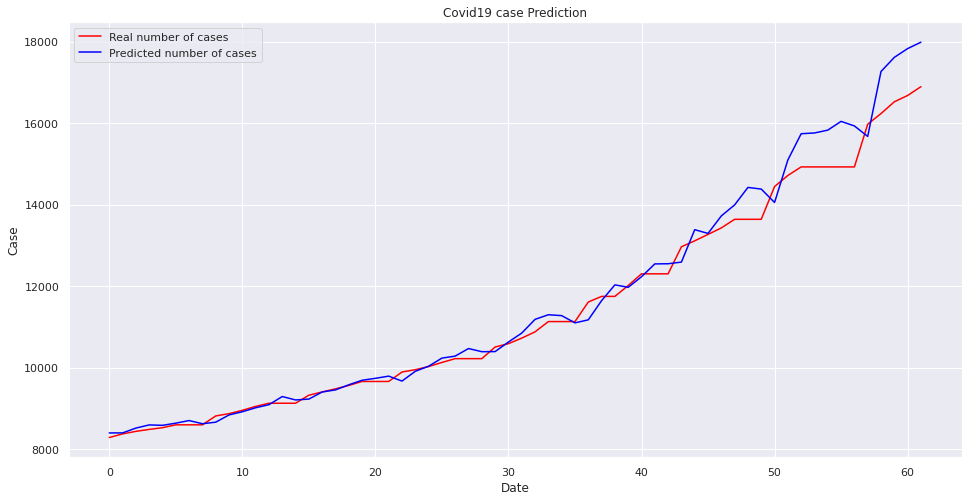

In [72]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB4,trainYB4)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB4 =my_B_model.predict(testXB4)
print("prediction\n", predictionB4)
print("\nPrediction Shape-",predictionB4.shape)

prediction_copies_array_B4 = np.repeat(predictionB4,13, axis=-1)
prediction_copies_array_B4

predB4 =scaler.inverse_transform(np.reshape(prediction_copies_array_B4,(len(predictionB4),13)))[:,0]

original_copies_array_B = np.repeat(testYB4,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB4),13)))[:,0]

print("Pred Values-- " ,predB4)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB4, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

5

<ipython-input-73-c6253649ccfd>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))


Epoch 1/50
15/15 [==============================] - 4s 56ms/step - loss: 0.3623 - val_loss: 1.2071
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0692 - val_loss: 0.3281
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0344 - val_loss: 0.5659
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0247 - val_loss: 0.4883
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0228 - val_loss: 0.4659
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0198 - val_loss: 0.4366
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0180 - val_loss: 0.4468
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0165 - val_loss: 0.4149
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.3772
Epoch 10/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0149 - val_loss: 0.3798
Epoch 11/50
15/15 

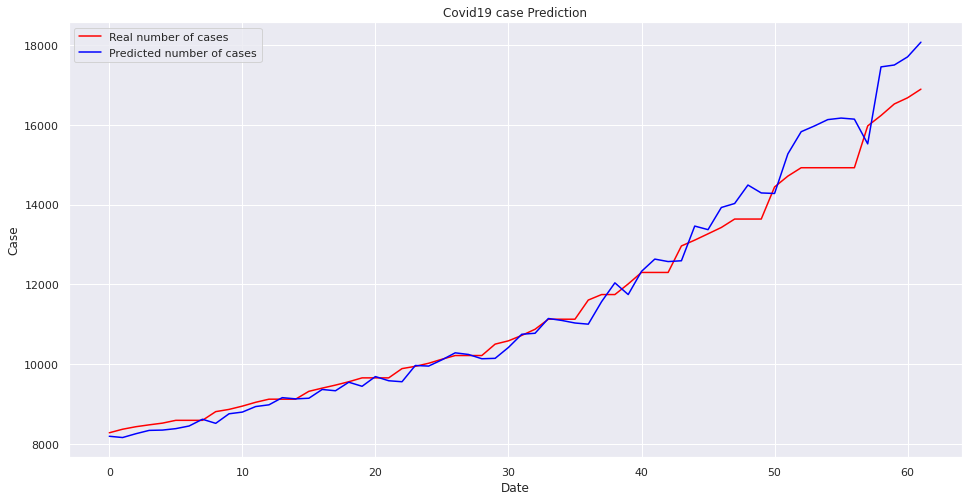

In [73]:
def build_B_model(optimizer):
    Bmodel = Sequential()
    Bmodel.add(Bidirectional(LSTM(16),input_shape=(1,13)))
    Bmodel.add(Dropout(0.2))
    Bmodel.add(Dense(1))
    Bmodel.compile(loss='mean_squared_error', optimizer= optimizer)
    return Bmodel

grid_model_B = KerasRegressor(build_fn=build_B_model,verbose=1,validation_data=(testXB,testYB))

parameterB = {'batch_size' : [9,11],
              'epochs' : [50,100],
              'optimizer' : ['adam','Adadelta'] }
    
grid_search_B  = GridSearchCV(estimator = grid_model_B,
                            param_grid = parameterB,
                            cv = 2)

grid_search_B = grid_search.fit(trainXB5,trainYB5)

grid_search_B.best_params_

my_B_model=grid_search_B.best_estimator_.model

predictionB5 =my_B_model.predict(testXB5)
print("prediction\n", predictionB5)
print("\nPrediction Shape-",predictionB5.shape)

prediction_copies_array_B5 = np.repeat(predictionB5,13, axis=-1)
prediction_copies_array_B5

predB5 =scaler.inverse_transform(np.reshape(prediction_copies_array_B5,(len(predictionB5),13)))[:,0]

original_copies_array_B = np.repeat(testYB5,13, axis=-1)
originalB=scaler.inverse_transform(np.reshape(original_copies_array_B,(len(testYB5),13)))[:,0]

print("Pred Values-- " ,predB5)
print("\nOriginal Values-- " ,originalB)

plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predB5, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

Average of 5 Bi-LSTM runs

In [74]:
predblstm = (predB1+predB2+predB3+predB4+predB5)/5
print(predblstm)

[ 8271.7295  8278.309   8398.723   8458.68    8452.016   8512.94
  8551.734   8626.387   8576.731   8785.178   8846.045   8974.825
  9034.481   9199.217   9129.185   9144.294   9359.404   9399.54
  9564.982   9623.34    9707.268   9700.312   9655.05    9960.764
 10009.416  10172.686  10275.111  10373.237  10330.508  10320.12
 10585.309  10780.268  10911.95   11188.721  11184.984  11065.461
 11117.669  11649.13   12019.077  11896.346  12279.737  12555.659
 12549.227  12569.576  13398.205  13330.401  13793.736  13986.472
 14436.939  14321.766  14164.037  15138.518  15738.311  15828.37
 15951.219  16066.044  16001.815  15644.3    17302.62   17647.434
 17834.451  18018.701 ]


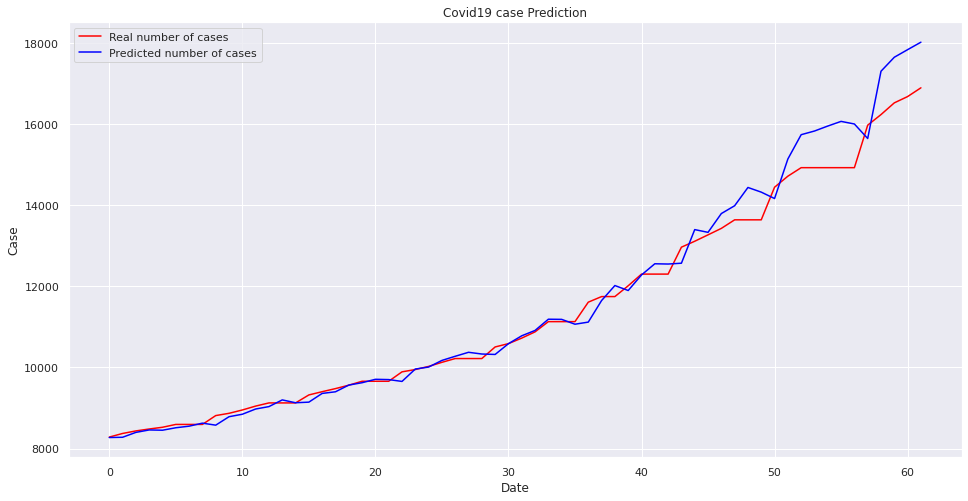

In [75]:
plt.plot(originalB, color = 'red', label = 'Real number of cases')
plt.plot(predblstm, color = 'blue', label = 'Predicted number of cases')
plt.title('Covid19 case Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.legend()
plt.show()

In [76]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(originalB, predblstm)))
print("MAE:",metrics.mean_absolute_error(originalB, predblstm))
print("MSE:",metrics.mean_squared_error(originalB, predblstm))
print("MAPE: ",MAPE(originalB,predblstm))

forecast_errors = [originalB[i]-predblstm[i] for i in range(len(originalB))]
print('Forecast Errors: %s' % forecast_errors)
bias = sum(forecast_errors) * 1.0/len(originalB)
print('Bias: %f' % bias)

print("std of LSTM : ", np.std(predblstm))

RMSE : 453.3
MAE: 282.00680443548384
MSE: 205515.74515551905
MAPE:  2.0750513771459267
Forecast Errors: [11.2705078125, 93.69140625, 36.27734375, 23.3203125, 72.984375, 82.0595703125, 43.265625, -31.38671875, 236.2685546875, 83.822265625, 104.955078125, 72.1748046875, 90.5185546875, -74.216796875, -4.1845703125, 177.7060546875, 42.595703125, 78.4599609375, -2.982421875, 35.66015625, -48.267578125, -41.3115234375, 235.9501953125, -12.763671875, 15.583984375, -46.685546875, -56.111328125, -154.2373046875, -111.5078125, 184.8798828125, 1.69140625, -57.267578125, -34.9501953125, -59.720703125, -55.984375, 63.5390625, 491.3310546875, 97.8701171875, -272.0771484375, 116.654296875, 21.2626953125, -254.6591796875, -248.2265625, 395.423828125, -287.205078125, -61.4013671875, -365.736328125, -347.4716796875, -797.939453125, -682.765625, 278.962890625, -423.517578125, -813.310546875, -903.3701171875, -1026.21875, -1141.0439453125, -1076.8154296875, 328.7001953125, -1068.619140625, -1124.43359375,